In [4]:
import sys
sys.path.append('../')
from analysis_pipeline import *

In [5]:
a=load_analysis('/Users/nathanielnyema/Downloads/photometry-scripts/analyses/analysis_adm53_adm54.npy')

recomputing...
successful


In [6]:
a.norm_method=norm_to_405

recomputing...
successful


../analysis_pipeline.py:584: RuntimeWarning: invalid value encountered in double_scalars
  return np.trapz(y,x=y.index)/(y.index[-1]-y.index[0])


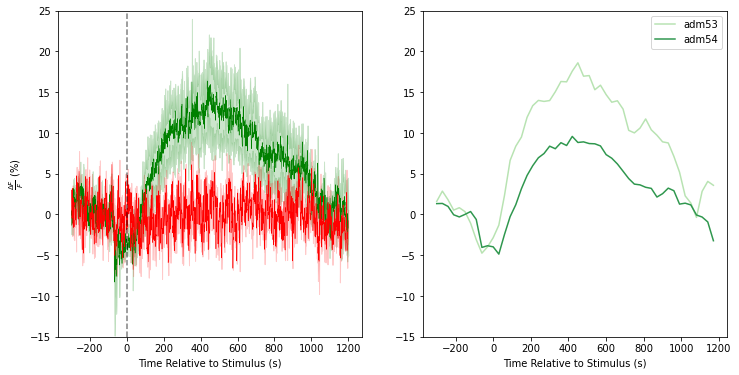

In [7]:
_,ax=py.subplots(1,2,figsize=(12,6))
a.plot_both(show=False,ax=ax[0])
ax[1].set_prop_cycle(color=[py.cm.Greens(i) for i in np.linspace(.3,.7,a.all_490.shape[-1])])
_,df=a.bin_data(30)
ax[1].plot(df*100)
ax[1].legend(df.columns.get_level_values('mouse'))
ax[1].set_xlabel('Time Relative to Stimulus (s)')
ylim=[-15,25]
ax[0].set_ylim(ylim)
ax[1].set_ylim(ylim)
py.show()

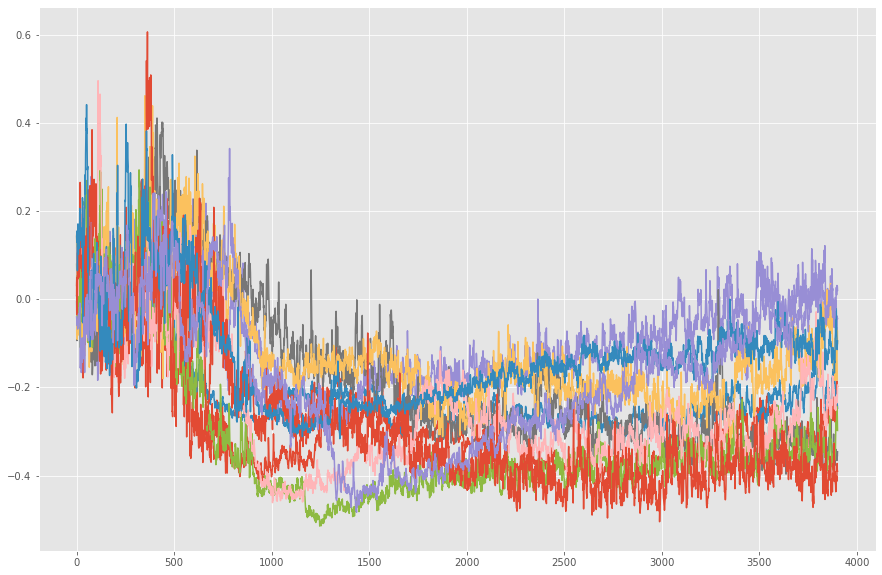

In [ ]:
from analysis_pipeline import *
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize']=(15,10)

fructose=load_analysis('/Users/nathanielnyema/Downloads/analyses_for_alex_thesis/analysis_AgRP_IDinfus_fructose_2_3kcal_n=10.npy')
glucose=load_analysis('/Users/nathanielnyema/Downloads/analyses_for_alex_thesis/analysis_AgRP_IDinfus_glucose_2_3kcal_n=10.npy')

f_data=fructose.all_490.copy()
g_data=glucose.all_490.copy()
if np.isnan(f_data).any():
    #check if there are nans and forward fill them first
    r,c=np.where(np.isnan(f_data))
    for i,j in zip(r,c):
        f_data[i,j]=f_data[i,j-1] if j>0 else 0

if np.isnan(g_data).any():
    #check if there are nans and forward fill them first
    r,c=np.where(np.isnan(g_data))
    for i,j in zip(r,c):
        g_data[i,j]=g_data[i,j-1] if j>0 else 0

plt.figure()
plt.plot(f_data.T);

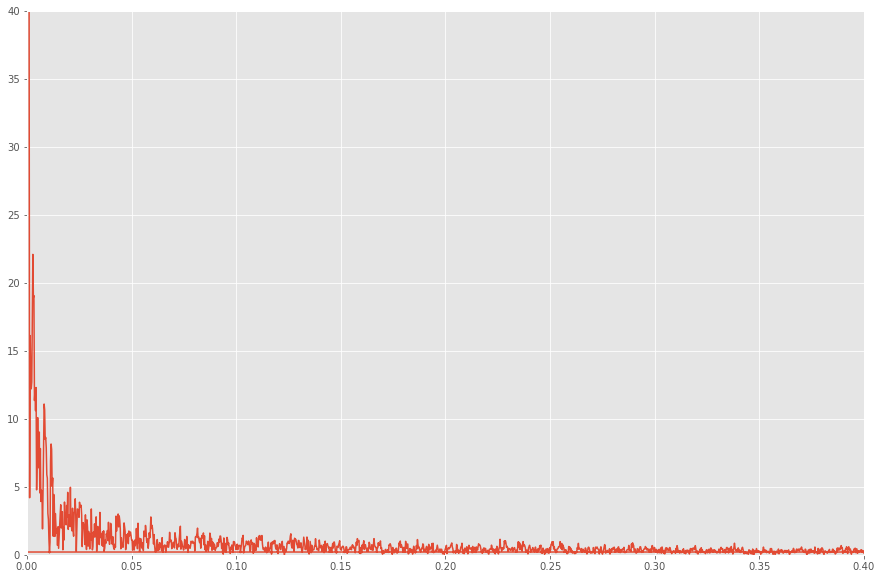

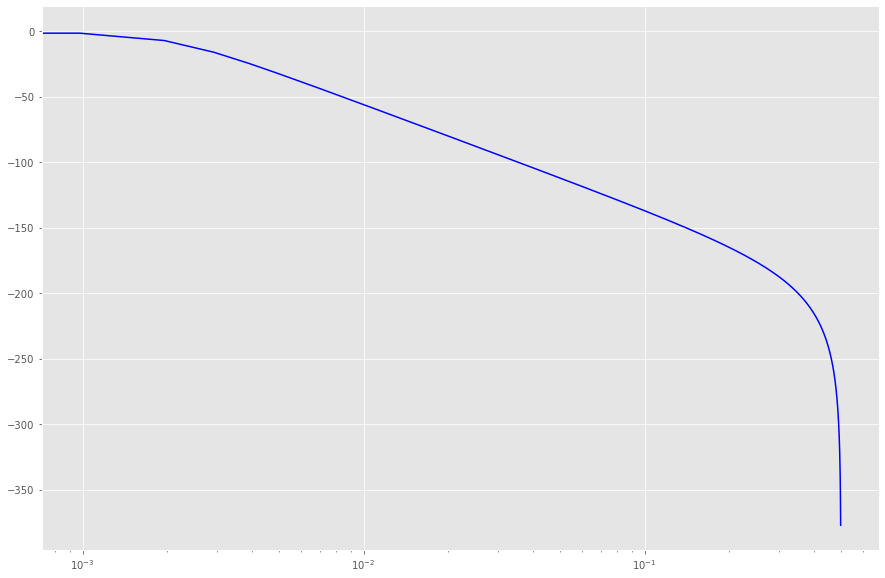

In [ ]:
sp=np.fft.fft(data,axis=1)
freq = np.fft.fftfreq(sp.shape[-1],d=1)
plt.plot(freq,np.abs(sp.mean(axis=0)))
plt.ylim([0,40])
plt.xlim([0,.4])
from scipy import signal
b,a1=signal.bessel(4,.002,'lowpass',fs=1)
w,h=signal.freqz(b,a1,fs=1)
plt.figure()
plt.semilogx(w, 20 * np.log10(abs(h)), 'b')

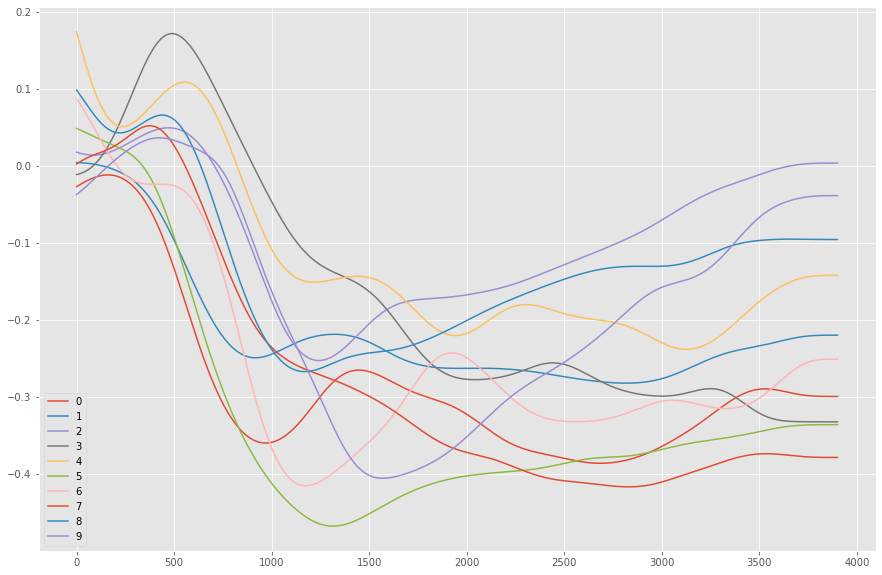

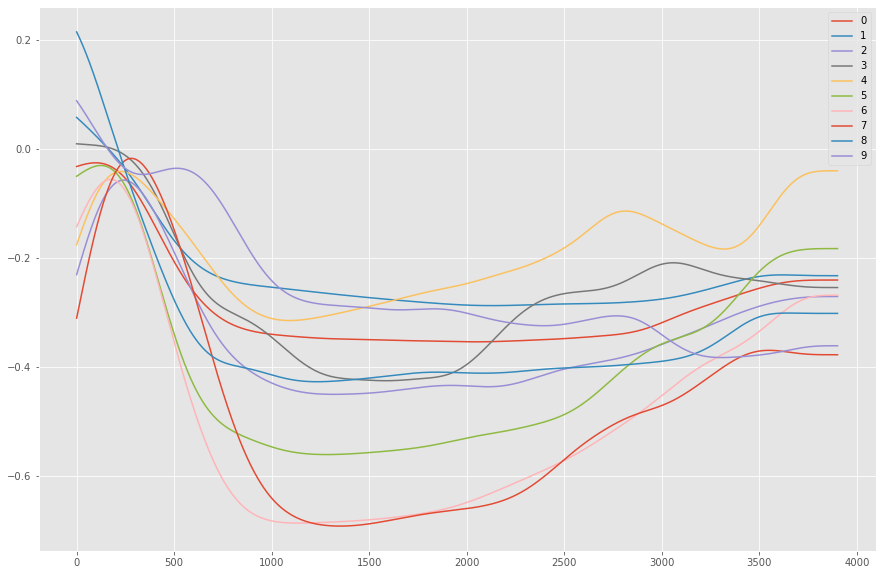

In [ ]:
filt_f_data=signal.filtfilt(b,a1,f_data,axis=1)
filt_g_data=signal.filtfilt(b,a1,g_data,axis=1)
plt.plot(filt_f_data.T)
plt.legend(np.arange(f_data.shape[0]))
plt.figure()
plt.plot(filt_g_data.T)
plt.legend(np.arange(g_data.shape[0]))

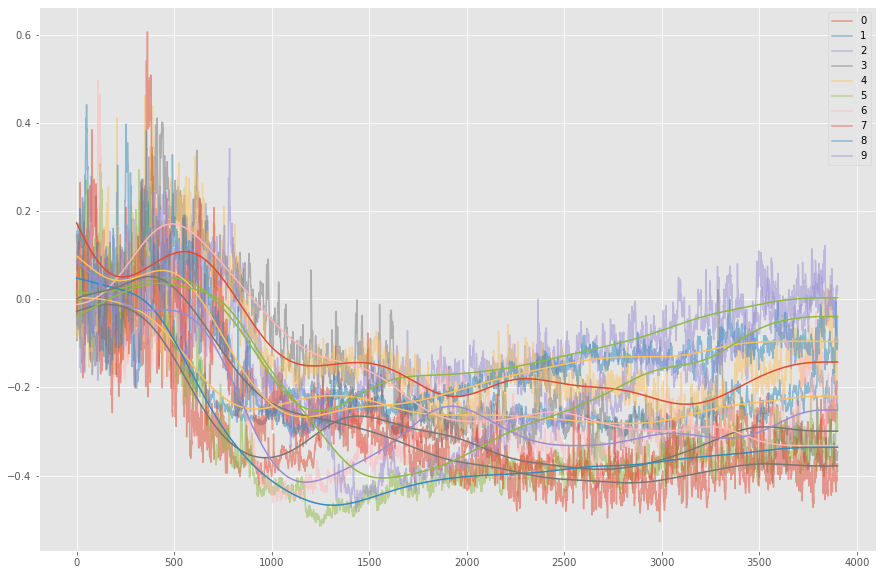

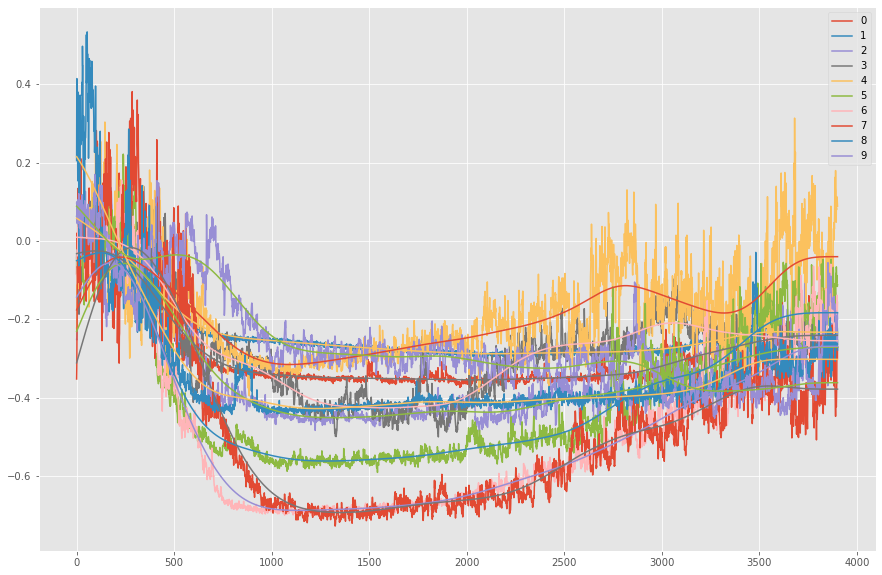

In [ ]:
plt.figure()
plt.plot(f_data.T,alpha=.5)
plt.plot(filt_f_data.T)
plt.legend(np.arange(f_data.shape[0]))
plt.figure()
plt.plot(g_data.T)
plt.plot(filt_g_data.T)
plt.legend(np.arange(g_data.shape[0]))

In [ ]:
half_f=.5*filt_f_data[:,300:].min(axis=1)
half_g=.5*filt_g_data[:,300:].min(axis=1)

half_time=lambda x: np.where(x)[0][0]

half_time_fructose=np.apply_along_axis(half_time,
                                       axis=1,
                                       arr=filt_f_data[:,300:]<half_f[:,np.newaxis])
half_time_glucose=np.apply_along_axis(half_time,
                                       axis=1,
                                       arr=filt_g_data[:,300:]<half_g[:,np.newaxis])

print(half_time_glucose)
print(half_time_fructose)

[155 152 247 273 265 150 192 367 126 596]
[ 277  280  625 1214  726  371  521  616  514  768]


Ttest_indResult(statistic=-3.4361040857787044, pvalue=0.0042480919122744355)


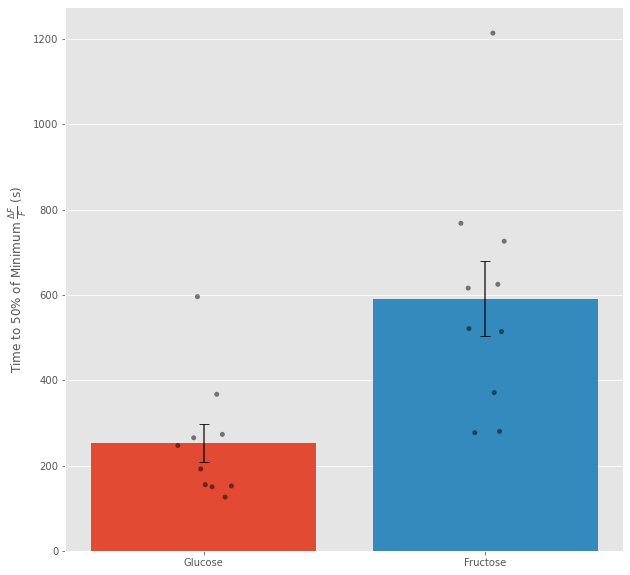

In [ ]:
import seaborn as sns
from scipy import stats as st
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.bar(0,half_time_glucose.mean())
plt.bar(1,half_time_fructose.mean())
sns.stripplot(data=[half_time_glucose,half_time_fructose],color='k',alpha=.5)
plt.errorbar([0,1],
             [half_time_glucose.mean(),half_time_fructose.mean()],
             yerr=[st.sem(half_time_glucose),st.sem(half_time_fructose)],
             linestyle='None',capsize=5,color='k',alpha=.8)
plt.xticks([0,1],['Glucose','Fructose'])
plt.ylabel(r'Time to 50% of Minimum $\frac{\Delta F}{F}$ (s)');
print(st.ttest_ind(half_time_glucose,half_time_fructose,equal_var=False))
plt.savefig('agrp_t_to_min_glucose_v_fructose.pdf')

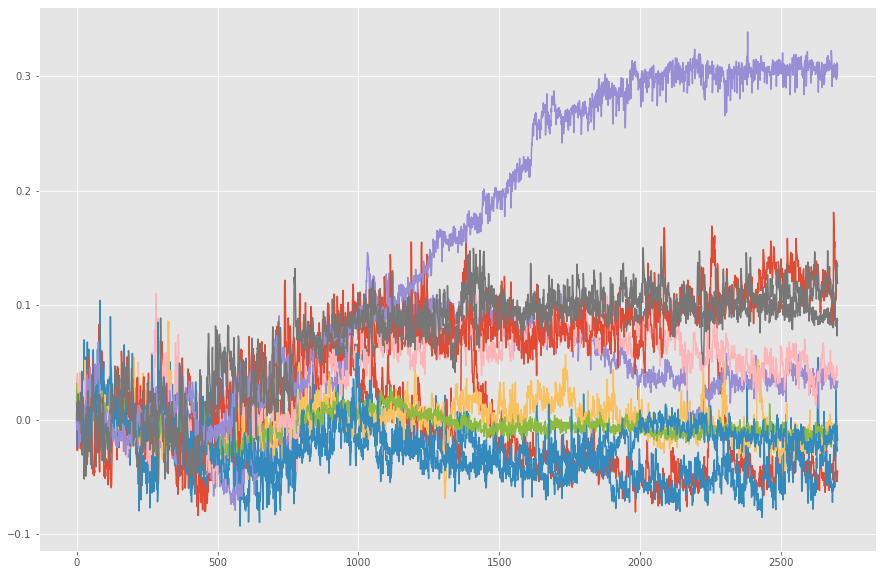

In [ ]:
fructose=load_analysis('/Users/nathanielnyema/Downloads/analyses_for_alex_thesis/analysis_IDinfus_16.67%fructose_n=11.npy')
glucose=load_analysis('/Users/nathanielnyema/Downloads/analyses_for_alex_thesis/analysis_IDinfus_16.67%glucose_n=8.npy')

f_data=fructose.all_490.copy()
g_data=glucose.all_490.copy()
if np.isnan(f_data).any():
    #check if there are nans and forward fill them first
    r,c=np.where(np.isnan(f_data))
    for i,j in zip(r,c):
        f_data[i,j]=f_data[i,j-1] if j>0 else 0

if np.isnan(g_data).any():
    #check if there are nans and forward fill them first
    r,c=np.where(np.isnan(g_data))
    for i,j in zip(r,c):
        g_data[i,j]=g_data[i,j-1] if j>0 else 0


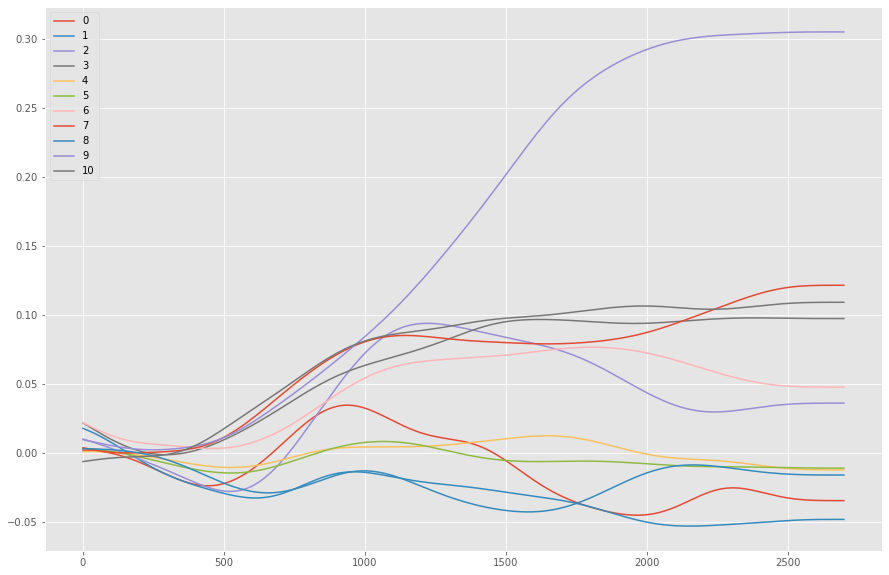

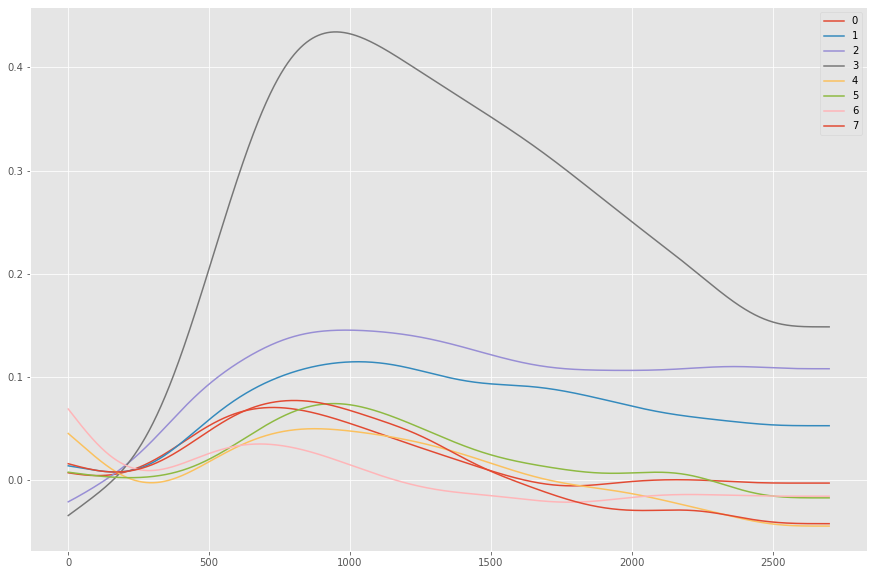

In [ ]:
filt_f_data=signal.filtfilt(b,a1,f_data,axis=1)
filt_g_data=signal.filtfilt(b,a1,g_data,axis=1)
plt.plot(filt_f_data.T)
plt.legend(np.arange(f_data.shape[0]))
plt.figure()
plt.plot(filt_g_data.T)
plt.legend(np.arange(g_data.shape[0]))

In [ ]:
half_f=.5*filt_f_data[:,300:].max(axis=1)
half_g=.5*filt_g_data[:,300:].max(axis=1)
half_time=lambda x: np.where(x)[0][0]


half_time_fructose=[]
for i,v in enumerate(filt_f_data[:,300:]):
    try:
        half_time_fructose.append(half_time(v>half_f[i]))
    except IndexError:
        half_time_fructose.append(np.NaN)
half_time_fructose=np.array(half_time_fructose)
half_time_glucose=np.apply_along_axis(half_time,
                                       axis=1,
                                       arr=filt_g_data[:,300:]>half_g[:,np.newaxis])

print(half_time_glucose)
print(half_time_fructose)

[100 196 120 214 249 308 122 152]
[ 465.   nan  597.  534. 1007.  601.  570.  520.   nan 1015.  466.]


Ttest_indResult(statistic=-6.030276398595728, pvalue=0.0001278392039347657)


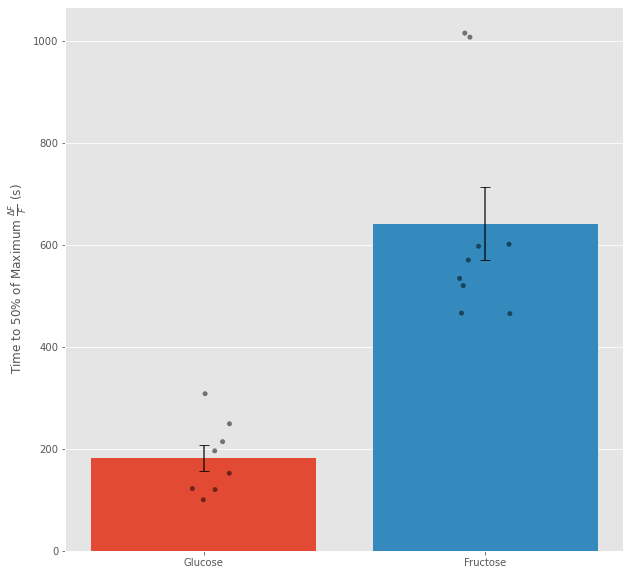

In [ ]:
import seaborn as sns
from scipy import stats as st
plt.style.use('ggplot')
plt.figure(figsize=(10,10))
plt.bar(0,half_time_glucose.mean())
plt.bar(1,np.nanmean(half_time_fructose))
sns.stripplot(data=[half_time_glucose,half_time_fructose],color='k',alpha=.5)
plt.errorbar([0,1],
             [half_time_glucose.mean(),np.nanmean(half_time_fructose)],
             yerr=[st.sem(half_time_glucose),st.sem(half_time_fructose,nan_policy='omit')],
             linestyle='None',capsize=5,color='k',alpha=.8)
plt.xticks([0,1],['Glucose','Fructose'])
plt.ylabel(r'Time to 50% of Maximum $\frac{\Delta F}{F}$ (s)');
print(st.ttest_ind(half_time_glucose,half_time_fructose[~np.isnan(half_time_fructose)],equal_var=False))
plt.savefig('da_t_to_max_glucose_v_fructose.pdf')

In [ ]:
st.sem(half_time_fructose,nan_policy='omit')

71.69534309996865

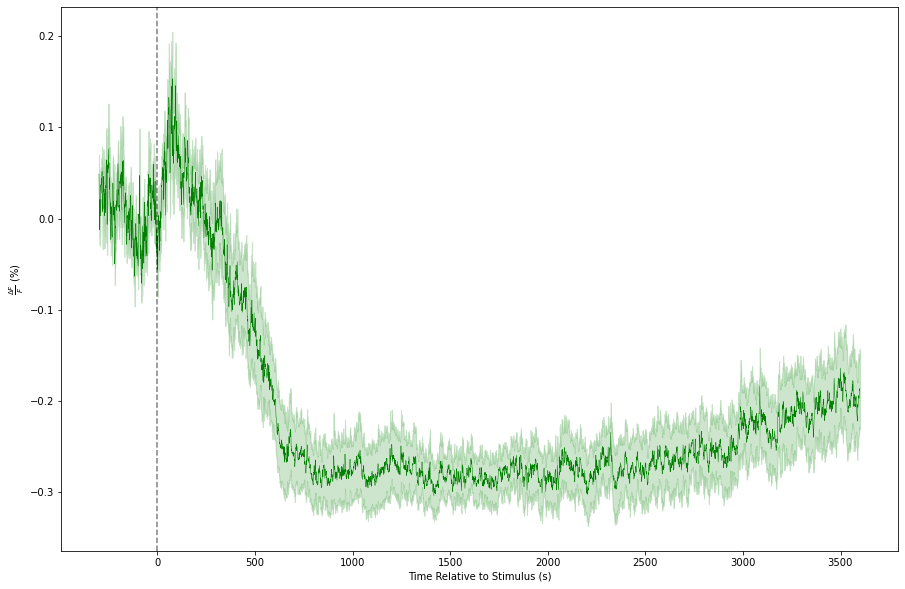

In [ ]:
a.plot_490()